In [1]:
import numpy as np
import ROOT as rt

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('olmo')

from histo_utilities import create_TH1D
from cebefo_style import cebefo_style
cebefo_style()

c_light = 2.99792458E8 #m/s

!cd /Users/olmo/programs/Delphes-3.4.1
rt.gSystem.Load("libDelphes");

rt.gInterpreter.Declare('#include "classes/DelphesClasses.h"');
rt.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"');

Welcome to JupyROOT 6.10/08


In [2]:
file_path = ['/Users/olmo/cernbox/PID_timing_studies/_root/gg2Rhad_PU0.root']

chain = rt.TChain('Delphes')
for path in file_path:
    chain.Add(path)
    
chain.Print()

treeReader = rt.ExRootTreeReader(chain)
numberOfEntries = treeReader.GetEntries()

branches_names = ['Event', 'Particle', 'Track','Vertex4D', 'GenVertex']
branch = {}

for b in branches_names:
    branch[b] = treeReader.UseBranch(b)

******************************************************************************
*Chain   :Delphes   : /Users/olmo/cernbox/PID_timing_studies/_root/gg2Rhad_PU0.root *
******************************************************************************
******************************************************************************
*Tree    :Delphes   : Analysis tree                                          *
*Entries :    10000 : Total =       601830042 bytes  File  Size =  242139840 *
*        :          : Tree compression factor =   2.49                       *
******************************************************************************
*Br    0 :Event     : Int_t Event_                                           *
*Entries :    10000 : Total  Size=      91796 bytes  File Size  =      13567 *
*Baskets :        8 : Basket Size=      64000 bytes  Compression=   5.95     *
*............................................................................*
*Br    1 :Event.fUniqueID : UInt_t fUniqueID[

ExRootAnalysisDict dictionary payload:16:10: fatal error: 'ExRootAnalysis/ExRootTreeReader.h' file not found
#include "ExRootAnalysis/ExRootTreeReader.h"
         ^
Error in <TInterpreter::AutoParse>: Error parsing payload code for class ExRootTreeReader with content:

#line 1 "ExRootAnalysisDict dictionary payload"

#ifndef G__VECTOR_HAS_CLASS_ITERATOR
  #define G__VECTOR_HAS_CLASS_ITERATOR 1
#endif

#define _BACKWARD_BACKWARD_WARNING_H

/** \class ExRootAnalysisLinkDef
 *
 *  Lists classes to be included in cint dicitonary
 *
 *  \author P. Demin - UCL, Louvain-la-Neuve
 *
 */

#include "ExRootAnalysis/ExRootTreeReader.h"
#include "ExRootAnalysis/ExRootTreeWriter.h"
#include "ExRootAnalysis/ExRootTreeBranch.h"
#include "ExRootAnalysis/ExRootResult.h"
#include "ExRootAnalysis/ExRootUtilities.h"
#include "ExRootAnalysis/ExRootClassifier.h"
#include "ExRootAnalysis/ExRootFilter.h"

#include "ExRootAnalysis/ExRootProgressBar.h"
#include "ExRootAnalysis/ExRootConfReader.h"
#include "ExRoo

(array([  6.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,   8.,   1.,   5.,
         17.,   7.,  10.,  24.,  33.,  15.,  40.,  19.,   8.,   2.,  49.,
         15.,  35.,  54.,  31.,  41.,  46.,  34.,  61.,  69.,  73., 118.,
        112., 133., 131., 166., 121., 191., 182., 189., 100., 193., 203.,
        160., 168., 209., 166., 232., 188., 217., 190., 182., 140., 145.,
        155., 187., 121., 110.,  96.,  99.,  81.,  69.,  41.,  31.,  25.,
         20.,  14.,  12.,  11.,   3.,   2.,   1.,   5.,   5.,   1.,   3.,
          4.,   0.,   1.,   5.,   2.,   3.,   2.,   0.,   2.,   2.,   0.,
          2.,   3.,   0.,   1.,   4.,   1.,   1.,   3.,   0.,   1.,   0.,
          1.]),
 array([-592.40146122, -583.41200176, -574.42254231, -565.43308286,
        -556.4436234 , -547.45416395, -538.46470449, -529.47524504,
        -520.48578558, -511.49632613, -502.50686667, -493.51740722,
        -484.52794776, -475.53848831, -466.54902885, -457.5595694 ,
        -448.57010995, -439.58065049, -430.591

In file included from ClassesDict dictionary payload:34:
/Users/olmo/programs/Delphes-3.4.1/classes/DelphesModule.h:30:10: fatal error: 'ExRootAnalysis/ExRootTask.h' file not found
#include "ExRootAnalysis/ExRootTask.h"
         ^
Error in <TInterpreter::AutoParse>: Error parsing payload code for class Track with content:

#line 1 "ClassesDict dictionary payload"

#ifndef G__VECTOR_HAS_CLASS_ITERATOR
  #define G__VECTOR_HAS_CLASS_ITERATOR 1
#endif

#define _BACKWARD_BACKWARD_WARNING_H
/*
 *  Delphes: a framework for fast simulation of a generic collider experiment
 *  Copyright (C) 2012-2014  Universite catholique de Louvain (UCL), Belgium
 *
 *  This program is free software: you can redistribute it and/or modify
 *  it under the terms of the GNU General Public License as published by
 *  the Free Software Foundation, either version 3 of the License, or
 *  (at your option) any later version.
 *
 *  This program is distributed in the hope that it will be useful,
 *  but WITHOUT ANY WA

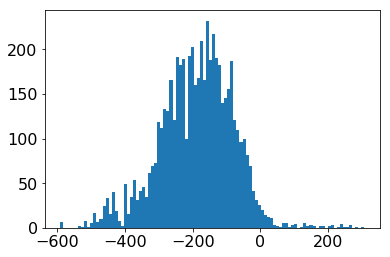

In [3]:
data = []
for i in range(numberOfEntries):
    treeReader.ReadEntry(i)
    
    for j in range(branch['Track'].GetEntries()):
        track = branch['Track'].At(j)
        
        if track.TOuter < 4.31e-9:
        
            p = track.Particle.GetObject()
            data.append(p.T*1E12)
#             beta = p.P/p.E

plt.hist(data, bins=100)
# h = create_TH1D(data)
# c = rt.TCanvas('c','c',800,600)
# h.Draw()
# c.Draw()

Aggiungi confronto con tempo del vertice

In [4]:
att_names = ['DT_f','DT_i','PID','beta','Nev', 'M',
             'pt', 'ctgTheta', 'dz', 'd0', 't_out', 'z_out','t_true',
             'x_true', 'y_true', 'z_true',
             'beta_z_true', 'xd', 'yd', 'zd', 'td', 'rh_true',
            'omega_true', 'phi_d', 'phi_0', 'IsPU', 'charge']
trk_att = []

gvtx_names = ['Nev','z','t']
gvtx_att = []


for i in range(numberOfEntries):
    treeReader.ReadEntry(i)
    
    for j in range(branch['GenVertex'].GetEntries()):
        vtx = branch['GenVertex'].At(j)
        
        gvtx_att.append((i, vtx.Z, vtx.T))
    
    for j in range(branch['Track'].GetEntries()):
        track = branch['Track'].At(j)
        pz = np.sqrt(track.P**2 - track.PT**2)
        
        p = track.Particle.GetObject()
        beta = p.P/p.E
        
        dt_f = track.TOuter - p.T
        dt_f -= track.L*1E-3/(c_light*beta)
        dt_f *= 1.E12
        
        dt_i = 1.E12*(track.T - p.T)
        
        rh_true = 1E9*p.PT/(p.Charge*3.8*c_light)
        
        omega_true = p.Charge*3.8*c_light**2/(p.E*1E9)
        
        trk_att.append((dt_f, dt_i, track.PID, beta, i, p.Mass, track.PT, track.CtgTheta, 
                        track.DZ, track.D0, track.TOuter, track.ZOuter, p.T, p.X, p.Y, p.Z, p.Pz/p.E,
                        track.Xd, track.Yd, track.Zd, track.Td,
                        rh_true, omega_true, track.Phi, p.Phi, p.IsPU, track.Charge))

particles = np.array(trk_att, dtype=zip(att_names,['<f8']*len(att_names)))
gen_vtx = np.array(gvtx_att, dtype=zip(gvtx_names,['<f8']*len(gvtx_names)))
        
DT_final = particles['DT_f']
print
print np.mean(DT_final), np.std(DT_final)/np.sqrt(DT_final.shape[0])
print np.std(DT_final)


-0.007508460209333268 0.042737726621964324
30.02373203650205


In file included from ClassesDict dictionary payload:34:
/Users/olmo/programs/Delphes-3.4.1/classes/DelphesModule.h:30:10: fatal error: 'ExRootAnalysis/ExRootTask.h' file not found
#include "ExRootAnalysis/ExRootTask.h"
         ^
Error in <TInterpreter::AutoParse>: Error parsing payload code for class Vertex with content:

#line 1 "ClassesDict dictionary payload"

#ifndef G__VECTOR_HAS_CLASS_ITERATOR
  #define G__VECTOR_HAS_CLASS_ITERATOR 1
#endif

#define _BACKWARD_BACKWARD_WARNING_H
/*
 *  Delphes: a framework for fast simulation of a generic collider experiment
 *  Copyright (C) 2012-2014  Universite catholique de Louvain (UCL), Belgium
 *
 *  This program is free software: you can redistribute it and/or modify
 *  it under the terms of the GNU General Public License as published by
 *  the Free Software Foundation, either version 3 of the License, or
 *  (at your option) any later version.
 *
 *  This program is distributed in the hope that it will be useful,
 *  but WITHOUT ANY W

 FCN=82.5226 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=3.22416e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.62170e+04   4.56732e+01   1.66542e-01  -1.91173e-07
   2  Mean        -4.81426e-03   4.27661e-02   1.90809e-04   5.28771e-05
   3  Sigma        3.00347e+01   3.01635e-02   1.22028e-06  -2.38490e-02


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


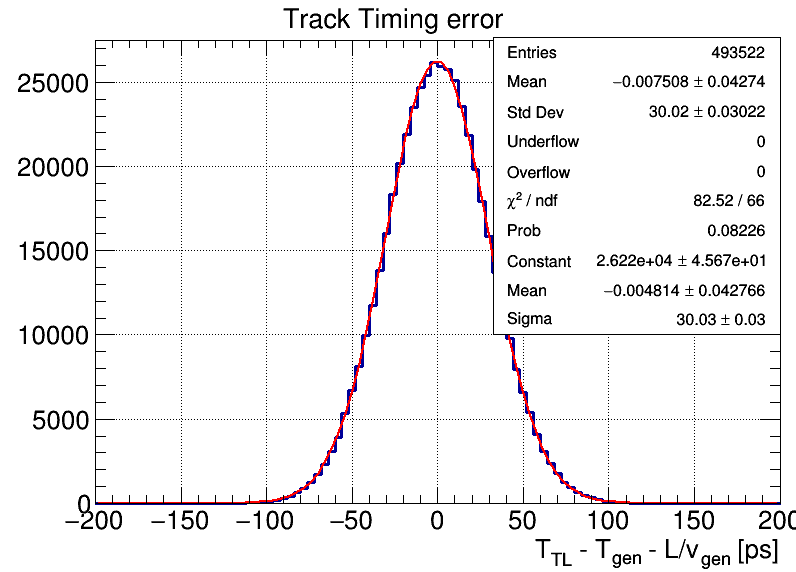

In [5]:
h = create_TH1D(DT_final, title = 'Track Timing error', binning = [100, -200,200])

h.SetXTitle('T_{TL} - T_{gen} - L/v_{gen} [ps]')

h.Fit('gaus')

c = rt.TCanvas('c','c',800,600)
h.Draw()
c.Draw()

In [22]:
SM_only = np.abs(particles['PID'])<1E6
BSM_only = np.abs(particles['PID'])>1E6

np.unique(np.abs(particles['PID'][SM_only]))

particle_name = {11:'electron', 13:'muon', 211:'pion', 321:'kaon', 2212:'proton'}

In [23]:
np.sum(BSM_only)

0

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


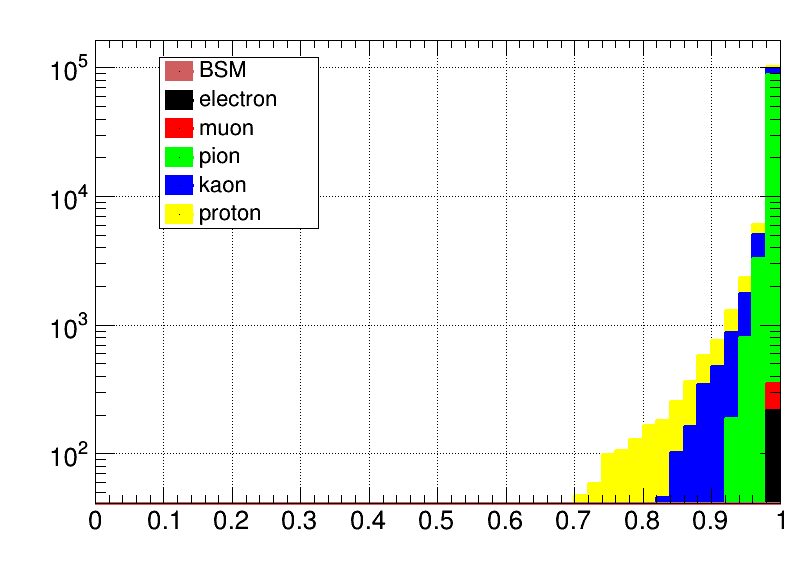

In [24]:
c = rt.TCanvas('c','c',800,600)
histos = []

hs = rt.THStack("hs","")

h = create_TH1D(particles['beta'][BSM_only], name='BSM', title='BSM', binning=[50, 0, 1])
h.SetLineColor(46)
h.SetFillColor(46)
h.SetStats(0)
histos.append(h)    
hs.Add(h)

for i, pid in enumerate(sorted(particle_name.keys())):
    n = particle_name[pid]    
    h = create_TH1D(particles['beta'][particles['PID']==pid], name=n, title=n, binning=[50, 0, 1])
    h.SetLineColor(i+1)
    h.SetFillColor(i+1)
    h.SetStats(0)
    histos.append(h)
    
    hs.Add(h)

hs.Draw()
c.BuildLegend(0.2, 0.6,0.4,0.9)
c.SetLogy()
# c.SetLogx()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: BSM (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: muon (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: electron (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: proton (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: kaon (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: pion (Potential memory leak).


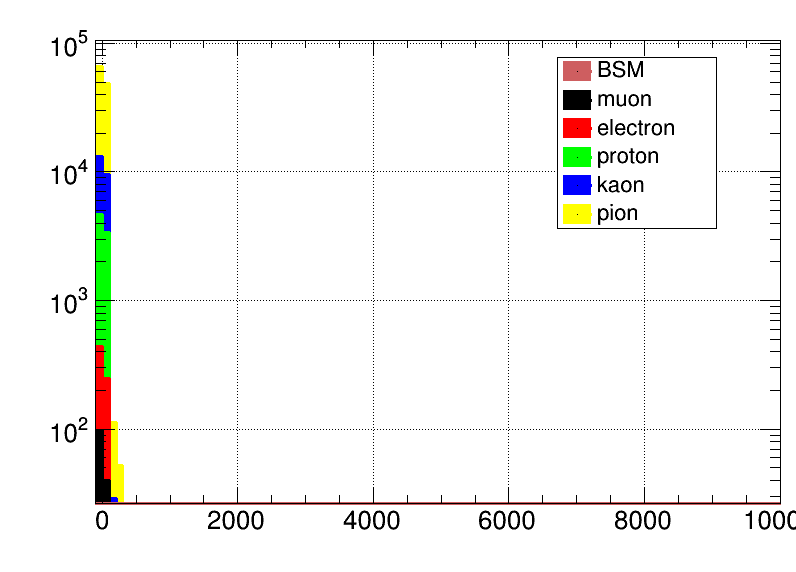

In [25]:
c = rt.TCanvas('c','c',800,600)
histos = []

hs = rt.THStack("hs","")

h = create_TH1D(particles['DT_i'][BSM_only], name='BSM', title='BSM', binning=[100, -100, 10000])
h.SetLineColor(46)
h.SetFillColor(46)
h.SetStats(0)
h.GetYaxis().SetRangeUser(0.5,2000)
histos.append(h)
hs.Add(h)

for i, pid in enumerate([211, 321, 2212, 11, 13][::-1]):
    n = particle_name[pid]    
    h = create_TH1D(particles['DT_i'][particles['PID']==pid], name=n, title=n, binning=[100, -100, 10000])
    h.SetLineColor(i+1)
    h.SetFillColor(i+1)
    h.SetStats(0)
    histos.append(h)
    
    hs.Add(h)

hs.Draw()
hs.GetYaxis().SetRangeUser(0.5,2000)
hs.Draw()
c.BuildLegend(0.7,0.6,0.9,0.9)
c.SetLogy()
# c.SetLogx()
c.Draw()

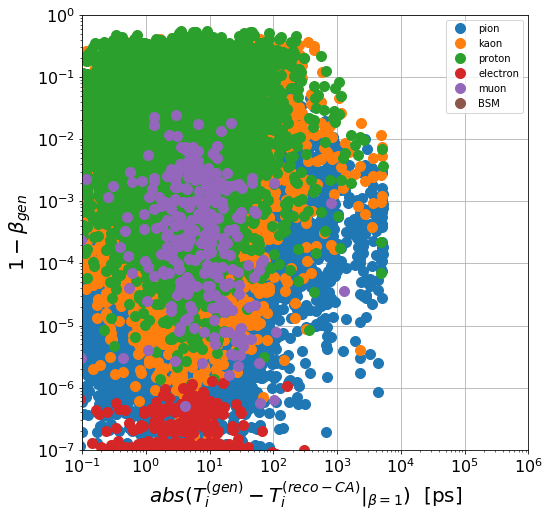

In [26]:
plt.figure(figsize=(8,8))
ax = plt.gca()

for pid in [211, 321, 2212, 11, 13]:
    sel = np.abs(particles['PID']) == pid
    ax.plot(np.abs(particles['DT_i'])[sel], 1-particles['beta'][sel], 'o', label = particle_name[pid])

ax.plot(np.abs(particles['DT_i'])[BSM_only], 1-particles['beta'][BSM_only], 'o', label = 'BSM')

plt.xlabel(r'$abs(T_i^{(gen)} - T_i^{(reco-CA)}|_{\beta=1})$  [ps]')
plt.ylabel(r'$1-\beta_{gen}$')
plt.ylim(1E-7,1)
plt.xlim(0.1, 1E6)
ax.set_yscale('log')
ax.set_xscale('log')
plt.grid()
plt.legend(loc='best')

## MC quantities

In [27]:
sel = particles['Nev'] == 0
sel_gv = gen_vtx['Nev'] == 0
particles['t_true'][sel]

array([9.29384208e-11, 9.14072845e-11, 9.14072845e-11, 9.29384208e-11,
       9.14072845e-11, 9.14072845e-11, 9.14072845e-11, 9.14072845e-11,
       9.14072845e-11, 9.14072845e-11, 9.14072845e-11, 9.14072845e-11,
       9.14072845e-11, 9.14072845e-11, 9.14072845e-11, 9.14072845e-11,
       9.14072845e-11, 9.14072845e-11, 9.14072845e-11, 9.14072845e-11,
       9.14072845e-11])

(-0.5, 0.5)

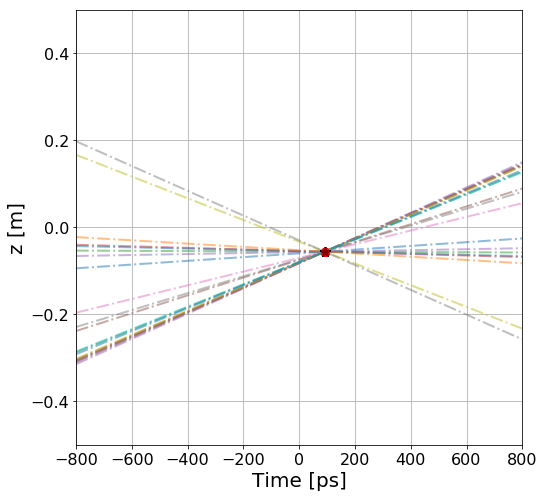

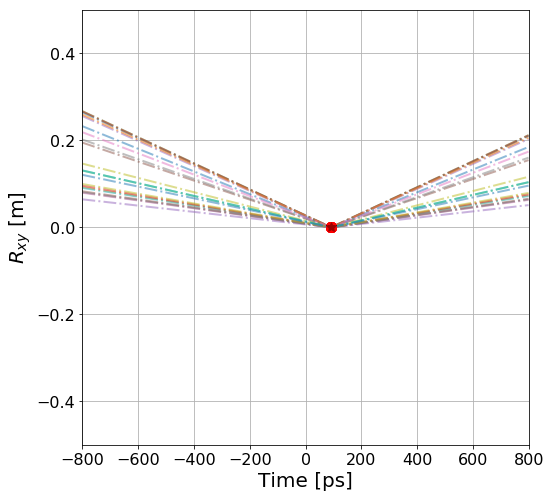

In [28]:
R_0 = np.column_stack([particles['x_true'][sel], particles['y_true'][sel], particles['z_true'][sel], particles['t_true'][sel]])
R_d = np.column_stack([particles['xd'][sel], particles['yd'][sel], particles['zd'][sel], particles['td'][sel]])

t_aux = np.arange(-800, 800, 3)

plt.figure(0, figsize=(8,8))
plt.figure(1, figsize=(8,8))
for r0, rd, bz, rh, omega, phi_d, phi_0, IsPU in zip(R_0, R_d, particles['beta_z_true'][sel], particles['rh_true'][sel],
                                                     particles['omega_true'][sel], particles['phi_d'][sel],
                                                     particles['phi_0'][sel], particles['IsPU'][sel]):
    
    r0[:3] *= 1E-3
    r0[3] *= 1E12
    
    rd[:3] *= 1E-3
    rd[3] *= 1E12

    z_aux = r0[2] + c_light*bz*1E-12*(t_aux-r0[3])
    
    phi_aux = phi_0-omega*1E-12*(t_aux-r0[3])
    
    d0 = rd[0]*np.sin(phi_d) - rd[1]*np.cos(phi_d)
    xc = (d0 + rh)*np.sin(phi_d)
    yc = -(d0 + rh)*np.cos(phi_d)
    rc = np.abs(d0 + rh)

    r_aux = rc**2 + rh**2 -2*rh*(xc*np.sin(phi_aux) - yc*np.cos(phi_aux))
    r_aux = np.sqrt(r_aux)
    
    style = [['k*','ro'],['b+','g*']]
    IsPU = int(IsPU)
    
    plt.figure(0)
    plt.plot(t_aux, z_aux, '-.', alpha=0.5)
    plt.plot(r0[3], r0[2], style[IsPU][0], markersize=10)
    plt.plot(rd[3], rd[2], style[IsPU][1], markersize=8, alpha=0.5)
    
    plt.figure(1)
    plt.plot(t_aux, r_aux, '-.', alpha=0.5)
    plt.plot(r0[3],np.hypot(r0[0], r0[1]), style[IsPU][0], markersize=10)
    plt.plot(rd[3], np.abs(d0), style[IsPU][1], markersize=10, alpha=0.6)

plt.xlabel('Time [ps]')
plt.xlim(-800,800)
plt.ylim(-0.5, 0.5)
plt.ylabel(r"$R_{xy}$ [m]")
plt.grid()
plt.figure(0)
plt.grid()
plt.xlabel('Time [ps]')
plt.ylabel('z [m]')
plt.xlim(-800,800)
plt.ylim(-0.5, 0.5)

## Reco and smeared quantities

Text(0,0.5,u'z [m]')

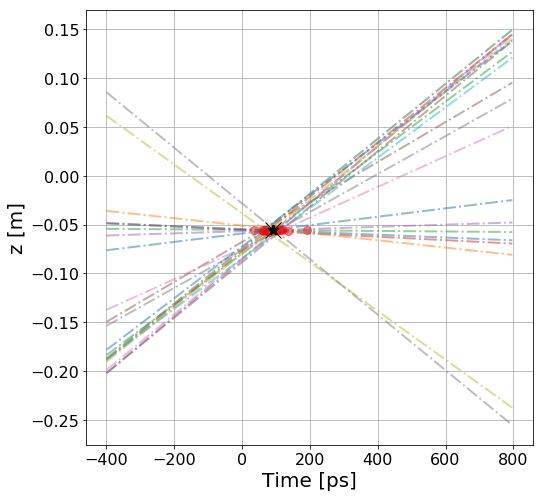

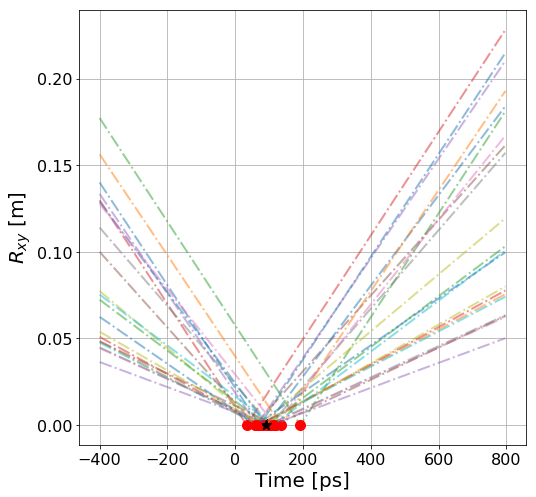

In [29]:
R_0 = np.column_stack([particles['x_true'][sel], particles['y_true'][sel], particles['z_true'][sel], particles['t_true'][sel]])

t_aux = np.arange(-400, 800, 3)

plt.figure(0, figsize=(8,8))
plt.figure(1, figsize=(8,8))
for r0, pt, ctg_theta, phi_d, dz, d0, t_out, z_out, charge, M, IsPU in zip(R_0, particles['pt'][sel], particles['ctgTheta'][sel],
                                                                particles['phi_d'][sel], particles['dz'][sel],
                                                                particles['d0'][sel], particles['t_out'][sel],
                                                                particles['z_out'][sel],
                                                                particles['charge'][sel], particles['M'][sel],
                                                                particles['IsPU'][sel]):
    r0[:3] *= 1E-3
    r0[3] *= 1E12
    
    t_out *= 1E12
    z_out *= 1E-3
    
#     M = 0.13
    
    dz *= 1E-3
    d0 *= 1E-3
    
    p = pt * np.sqrt(1 + ctg_theta**2)
    e = np.sqrt(p**2 + M**2)
    bz = pt*ctg_theta/e

    z_aux = z_out + c_light*bz*1E-12*(t_aux-t_out)
    td = t_out + 1E12*(dz-z_out)/(c_light*bz)
    
    omega = charge*3.8*c_light**2/(e*1E9)
    phi_aux = phi_d-omega*1E-12*(t_aux-td)
    
    rh = 1E9*pt/(charge*3.8*c_light)
    xc = (d0 + rh)*np.sin(phi_d)
    yc = -(d0 + rh)*np.cos(phi_d)
    rc = np.abs(d0 + rh)

    r_aux = rc**2 + rh**2 -2*rh*(xc*np.sin(phi_aux) - yc*np.cos(phi_aux))
    r_aux = np.sqrt(r_aux)
    
    style = [['k*','ro'],['g*','b+']]
    IsPU = int(IsPU)
    
    plt.figure(0)
    plt.plot(t_aux, z_aux, '-.', alpha=0.5)
    plt.plot(r0[3], r0[2], style[IsPU][0], markersize=10)
    plt.plot(td, dz, style[IsPU][1], markersize=8, alpha=0.5)
    
    plt.figure(1)
    plt.plot(t_aux, r_aux, '-.', alpha=0.5)
    plt.plot(r0[3],np.hypot(r0[0], r0[1]), style[IsPU][0], markersize=10)
    plt.plot(td, np.abs(d0), style[IsPU][1], markersize=10)
    


for z, t in zip(gen_vtx['z'][sel_gv], gen_vtx['t'][sel_gv]):
    plt.figure(0)
    plt.plot(t*1E12, z*1E-3, 'xk', markersize=16)
    
plt.figure(1)
plt.xlabel('Time [ps]')
plt.ylabel(r"$R_{xy}$ [m]")
plt.grid()
plt.figure(0)
plt.grid()
plt.xlabel('Time [ps]')
plt.ylabel('z [m]')

In [30]:
np.atleast_2d([gen_vtx['z'][sel_gv], gen_vtx['t'][sel_gv]])

array([[-5.58767433e+01],
       [ 9.14072845e-11]])